# <a id='toc1_'></a>[EDA Inicial Geral](#toc0_)


In [1]:
import pandas as pd 
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_dir = "C:/Users/tiago/OneDrive/Desktop/TCC/Dados/dataset-mcc5-thu/"
df = pd.read_csv(data_dir +'health_torque_circulation_2000rpm_10Nm.csv')
#df = pd.read_csv(file+'miss_teeth_speed_circulation_10Nm_1000rpm.csv')
df #base exmeplo

,speed,torque,motor_vibration_x,motor_vibration_y,motor_vibration_z,gearbox_vibration_x,gearbox_vibration_y,gearbox_vibration_z
0,3.758216,0.241321,-0.010908,0.009513,-0.006354,-0.003183,-0.010979,-0.006938
1,3.517859,0.268215,0.001800,-0.000536,0.017226,0.010991,-0.006032,0.012732
2,3.644363,0.217158,-0.005054,0.004601,0.006115,0.008774,0.010097,0.022137
3,3.685141,0.224024,-0.010288,0.011730,-0.007236,0.006652,-0.005805,0.004613
4,3.511633,0.298339,-0.007951,0.013053,-0.001419,-0.005436,-0.008583,0.002801
...,...,...,...,...,...,...,...,...
767994,0.003990,0.564331,0.248599,0.256348,-0.979280,0.327730,0.117361,-0.190961
767995,0.005049,0.561190,0.369811,-0.244403,0.779784,-0.466788,-0.195241,0.338602
767996,0.004544,0.552529,0.076640,-0.241494,1.303625,-0.383103,-0.506246,0.149345
767997,0.005809,0.559276,-0.133109,0.230193,-0.857019,-0.710452,0.115657,-0.243902


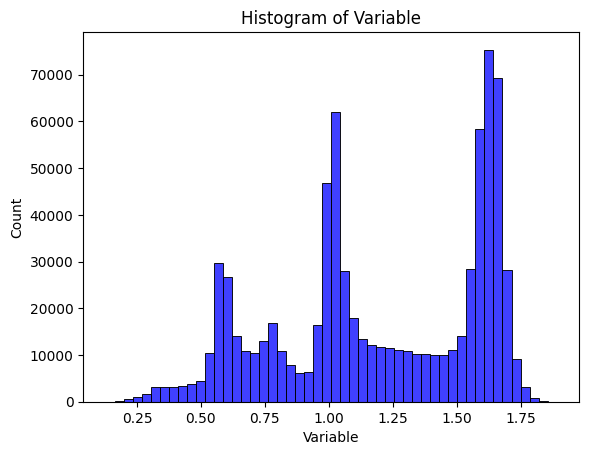

In [3]:
def plot_hist(dataframe,variable):    
    sns.histplot(dataframe[variable], bins=50, color='blue', kde=False)
    plt.title('Histogram of Variable')
    plt.xlabel('Variable')
    plt.ylabel('Count')
    return plt.show()
plot_hist(df,"torque")

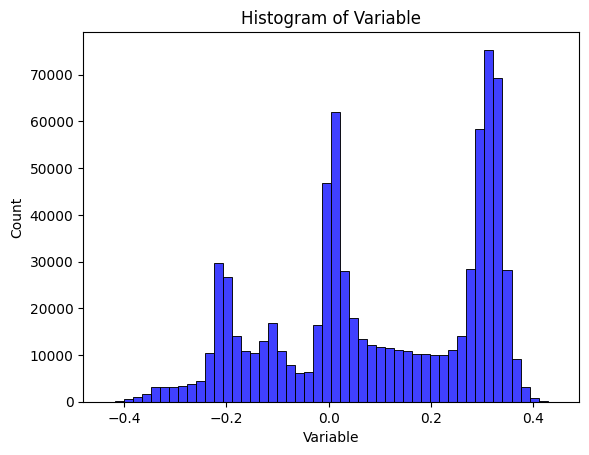

In [4]:
df2 = (df-1)/2
plot_hist(df2,"torque")

## Criação da basona, divisão inicial das databases

Meu objetivo é extrair as informações do nome das bases, jogar pra dentro das bases como coluna e depois juntar as bases

### Criação das df com as bases 4-torque e 4-speed



Definição das funções que vão pegar as bases pelo nome e agrupar
- health
- miss teeth
- dataset-4
- tbab


def função 4

In [5]:
# Definição funções speed4 e torque4
def extract_info_from_filename_speed(filename):
    # Usando regex para extrair as partes relevantes do nome do arquivo
    pattern1 = r"^(.*)_(L|M|H)_(speed_circulation)_(\d+Nm)_(\d+rpm|rpm\d+)\.csv$" #essa ordem so funciona se vier torque primeiro (speed circulation)
    match = re.match(pattern1, filename)
    if match:
        return {
            "Fault": match.group(1),
            "Degree": match.group(2),
            "Categoria": match.group(3),
            "Torque": match.group(4),
            "Rotação": match.group(5)
        }
    return {}

def função miss teeth

In [6]:
# definição da função miss-teeth
def extract_info_from_filename_miss_teeth_speed(filename):
    pattern1 = r"^(.*)_(speed_circulation)_(\d+Nm)_(\d+rpm|rpm\d+)\.csv$" #essa ordem so funciona se vier torque primeiro (speed circulation)
    match = re.match(pattern1, filename)
    if match:
        return {
            "Fault": match.group(1),
            "Categoria": match.group(2),
            "Torque": match.group(3),
            "Rotação": match.group(4)
        }
    return {}

def função health

In [7]:
# definição da função health
def extract_info_from_filename_health_speed(filename):
    pattern1 = r"^(.*)_(speed_circulation)_(\d+Nm)_(\d+rpm|rpm\d+)\.csv$" #essa ordem so funciona se vier torque primeiro (speed circulation)
    match = re.match(pattern1, filename)
    if match:
        return {
            "Fault": match.group(1),
            "Categoria": match.group(2),
            "Torque": match.group(3),
            "Rotação": match.group(4)
        }
    return {}

def função teeth_break_and_bearing (tbab)

In [8]:
# Definição funções speed4 e torque4
def extract_info_from_filename_tbab_speed(filename):
    pattern1 = r"^(.*)_(L|M|H)_(speed_circulation)_(\d+Nm)_(\d+rpm|rpm\d+)\.csv$" #essa ordem so funciona se vier torque primeiro (speed circulation)
    match = re.match(pattern1, filename)
    if match:
        return {
            "Fault": match.group(1),
            "Degree": match.group(2),
            "Categoria": match.group(3),
            "Torque": match.group(4),
            "Rotação": match.group(5)
        }
    return {}



Teste

In [9]:
#teste da função filename
#ex0 = 'gear_pitting_H_speed_circulation_10Nm_1000rpm.csv' #speed circ dataset4
ex1 = 'teeth_break_and_bearing_inner_H_speed_circulation_20Nm_2000rpm.csv'
info1 = extract_info_from_filename_tbab_speed(ex1)
for col, value in info1.items():
   df[col] = value

info1.items()


dict_items([('Fault', 'teeth_break_and_bearing_inner'), ('Degree', 'H'), ('Categoria', 'speed_circulation'), ('Torque', '20Nm'), ('Rotação', '2000rpm')])

testar agora a iteração, teoricamente ao aplicar uma fórmula pra categoria errada, vai apenas retornar vazios oq não seria problema


função combine_datasets: 
- vai servir para combinar os df em um só, e ja trazer as infos novas necessárias (infos referente aos nomes)
- Essa função vai iterar por todas as 240 databases (na prática pelos seus subgrupos)


In [10]:
#Definição da função combine_datasets


teste_data_dir = "C:/Users/tiago/OneDrive/Desktop/TCC/Dados/teste-speed/"
#class = extract_info_from_filename_speed()
# Função para processar e combinar todas as bases de dados

def process_and_combine_datasets(data_dir,class_function): #aqui defino no input qual o diretório de data (pasta) e qual função vou usar 
    combined_dataframes = []
    combined_datafiles = []
    # Para cada arquivo CSV no diretório
    for filename in os.listdir(data_dir):
        if filename.endswith(".csv"):
            filepath = os.path.join(data_dir, filename)

            # Carregando o dataset
            df = pd.read_csv(filepath)

            # Extraindo informações do nome do arquivo e adicionando como novas colunas
            info = class_function(filename) ## utilizar a função adequada a cada nome de base ## 
            for col, value in info.items():
                df[col] = value

            #Adicionando uma coluna de index e tempo:
            df['time_index'] =df.index
            df['time'] = df['time_index']/12800
            #filtrando o dataframe pelo intervalo de tempo de 10-20s
            df = df[(df['time']>10) & (df['time']<20)] 
            # Adicionando ao conjunto de dataframes combinados
            #col = "Fault"       # fui obrigado a atribuir um valor pra col, pq ele n tava lendo na hr de passar a função miss_teeth_torque, por algum motivo que n sei; teoricamente isso n muda nada no código, só deixa ele um pouco menos genérico, mas como todos meus datasets vão ter a coluna 'Fault' não será problema
            if "Fault" in df.columns:
                if df["Fault"].notna().any():
                    combined_dataframes.append(df)
                    combined_datafiles.append(filename)
    else:
        print(f"Columns [col] not found in [filename]")    #essa parte da formula me permite ler pastas com ambos arquivos speed e torque e só pegar o válido e ignorar os demais
            
    # Combinando todos os dataframes em um único DataFrame final
    #final_df = pd.concat(combined_dataframes, ignore_index=True)
    if combined_dataframes:
        final_df = pd.concat(combined_dataframes, ignore_index=True)
    else:
        final_df = pd.DataFrame()  # Empty DataFrame if no data available

    return final_df, combined_datafiles

# Processando e combinando os datasets
#combined_dataset, file_names = process_and_combine_datasets(teste_data_dir,extract_info_from_filename_speed)


Combinar datasets 4 speed

In [11]:
# Combinação dos datasets com 4 tipos de falha com parametro de speed (72 arquivos)
speed_data4_dir = "C:/Users/tiago/OneDrive/Desktop/TCC/Dados/split-dataset2-speed/speed-dataset-4/"
combined_speed4_dataset, file_names = process_and_combine_datasets(speed_data4_dir,extract_info_from_filename_speed)
print(f'number of files = {len(combined_speed4_dataset)/127999}')
print(f'combined files : {file_names}')
combined_speed4_dataset

Columns [col] not found in [filename]
number of files = 72.0
combined files : ['gear_pitting_H_speed_circulation_10Nm_1000rpm.csv', 'gear_pitting_H_speed_circulation_10Nm_2000rpm.csv', 'gear_pitting_H_speed_circulation_10Nm_3000rpm.csv', 'gear_pitting_H_speed_circulation_20Nm_1000rpm.csv', 'gear_pitting_H_speed_circulation_20Nm_2000rpm.csv', 'gear_pitting_H_speed_circulation_20Nm_3000rpm.csv', 'gear_pitting_L_speed_circulation_10Nm_1000rpm.csv', 'gear_pitting_L_speed_circulation_10Nm_2000rpm.csv', 'gear_pitting_L_speed_circulation_10Nm_3000rpm.csv', 'gear_pitting_L_speed_circulation_20Nm_1000rpm.csv', 'gear_pitting_L_speed_circulation_20Nm_2000rpm.csv', 'gear_pitting_L_speed_circulation_20Nm_3000rpm.csv', 'gear_pitting_M_speed_circulation_10Nm_1000rpm.csv', 'gear_pitting_M_speed_circulation_10Nm_2000rpm.csv', 'gear_pitting_M_speed_circulation_10Nm_3000rpm.csv', 'gear_pitting_M_speed_circulation_20Nm_1000rpm.csv', 'gear_pitting_M_speed_circulation_20Nm_2000rpm.csv', 'gear_pitting_M_spee

,speed,torque,motor_vibration_x,motor_vibration_y,motor_vibration_z,gearbox_vibration_x,gearbox_vibration_y,gearbox_vibration_z,Fault,Degree,Categoria,Torque,Rotação,time_index,time
0,0.002592,-1.325589,0.047207,-0.108683,0.407696,1.025581,0.290895,0.182557,gear_pitting,H,speed_circulation,10Nm,1000rpm,128001,10.000078
1,0.003558,-1.346427,0.280631,-0.089622,0.017357,0.892568,0.476992,0.106871,gear_pitting,H,speed_circulation,10Nm,1000rpm,128002,10.000156
2,0.003866,-1.295078,0.350249,0.008273,-0.193989,0.493085,0.565314,0.084317,gear_pitting,H,speed_circulation,10Nm,1000rpm,128003,10.000234
3,0.002155,-1.343662,0.179398,-0.023937,0.179744,0.273848,0.171864,-0.006127,gear_pitting,H,speed_circulation,10Nm,1000rpm,128004,10.000312
4,0.003532,-1.352513,-0.093508,-0.166369,0.200927,0.063908,-0.606298,0.085628,gear_pitting,H,speed_circulation,10Nm,1000rpm,128005,10.000391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9215923,0.002024,3.446752,-0.573409,-0.689030,1.759148,-1.111972,4.753470,-0.034046,teeth_crack,M,speed_circulation,20Nm,3000rpm,255995,19.999609
9215924,0.004624,3.390956,-0.581932,-1.028788,0.248277,-1.513732,0.305319,0.100792,teeth_crack,M,speed_circulation,20Nm,3000rpm,255996,19.999688
9215925,0.002509,3.470814,0.021076,0.273228,-3.073406,-1.931751,-3.158033,-0.356591,teeth_crack,M,speed_circulation,20Nm,3000rpm,255997,19.999766
9215926,-0.000750,3.469151,-0.056255,0.478232,-1.435185,-2.597821,-3.621578,-1.107836,teeth_crack,M,speed_circulation,20Nm,3000rpm,255998,19.999844


Combinar datasets miss_teeth speed'

In [12]:
miss_teeth_dir = "C:/Users/tiago/OneDrive/Desktop/TCC/Dados/split-dataset2-speed/miss-teeth-dataset/"
combined_miss_teeth_speed_dataset, file_names = process_and_combine_datasets(miss_teeth_dir,extract_info_from_filename_miss_teeth_speed)
print(f'number of files = {len(combined_miss_teeth_speed_dataset)/127999}')
print(f'combined files : {file_names}')
combined_miss_teeth_speed_dataset

Columns [col] not found in [filename]
number of files = 6.0
combined files : ['miss_teeth_speed_circulation_10Nm_1000rpm.csv', 'miss_teeth_speed_circulation_10Nm_2000rpm.csv', 'miss_teeth_speed_circulation_10Nm_3000rpm.csv', 'miss_teeth_speed_circulation_20Nm_1000rpm.csv', 'miss_teeth_speed_circulation_20Nm_2000rpm.csv', 'miss_teeth_speed_circulation_20Nm_3000rpm.csv']


,speed,torque,motor_vibration_x,motor_vibration_y,motor_vibration_z,gearbox_vibration_x,gearbox_vibration_y,gearbox_vibration_z,Fault,Categoria,Torque,Rotação,time_index,time
0,0.006852,1.357502,0.122034,-0.082505,-0.072813,-0.595498,0.098562,-0.268209,miss_teeth,speed_circulation,10Nm,1000rpm,128001,10.000078
1,0.003530,1.360261,0.003898,-0.066793,0.133944,-0.833940,-0.126612,-0.370836,miss_teeth,speed_circulation,10Nm,1000rpm,128002,10.000156
2,0.004468,1.380777,-0.099719,-0.035381,0.117970,-0.900829,-0.299299,-0.448692,miss_teeth,speed_circulation,10Nm,1000rpm,128003,10.000234
3,0.004634,1.384205,-0.099945,-0.068498,-0.138450,-0.806367,-0.352085,-0.352967,miss_teeth,speed_circulation,10Nm,1000rpm,128004,10.000312
4,0.002095,1.382309,-0.084376,-0.112319,0.028825,-0.356400,-0.438976,-0.138569,miss_teeth,speed_circulation,10Nm,1000rpm,128005,10.000391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767989,-0.001750,3.485775,0.107300,0.408268,3.573644,-2.234137,11.810291,-2.081585,miss_teeth,speed_circulation,20Nm,3000rpm,255995,19.999609
767990,0.003258,3.505504,-0.217938,0.467730,-3.502631,-2.679181,10.202336,-2.897263,miss_teeth,speed_circulation,20Nm,3000rpm,255996,19.999688
767991,0.004052,3.509480,0.251090,0.559509,-2.722013,-1.240516,2.839994,-2.189994,miss_teeth,speed_circulation,20Nm,3000rpm,255997,19.999766
767992,0.000410,3.487009,0.947428,0.376415,5.140054,1.234496,-5.028784,-0.295937,miss_teeth,speed_circulation,20Nm,3000rpm,255998,19.999844


Combinar datasets health speed

In [13]:
health_dir = "C:/Users/tiago/OneDrive/Desktop/TCC/Dados/split-dataset2-speed/health-dataset/"
combined_health_speed_dataset, file_names = process_and_combine_datasets(health_dir,extract_info_from_filename_health_speed)
print(f'number of files = {len(combined_health_speed_dataset)/127999}')
print(f'combined files : {file_names}')
combined_health_speed_dataset

Columns [col] not found in [filename]
number of files = 6.0
combined files : ['health_speed_circulation_10Nm_1000rpm.csv', 'health_speed_circulation_10Nm_2000rpm.csv', 'health_speed_circulation_10Nm_3000rpm.csv', 'health_speed_circulation_20Nm_1000rpm.csv', 'health_speed_circulation_20Nm_2000rpm.csv', 'health_speed_circulation_20Nm_3000rpm.csv']


,speed,torque,motor_vibration_x,motor_vibration_y,motor_vibration_z,gearbox_vibration_x,gearbox_vibration_y,gearbox_vibration_z,Fault,Categoria,Torque,Rotação,time_index,time
0,3.605299,1.489353,-0.162697,-0.096869,0.244939,0.235105,0.286853,0.070071,health,speed_circulation,10Nm,1000rpm,128001,10.000078
1,3.555846,1.480216,-0.028622,-0.054205,0.054205,-0.251067,0.200176,0.027478,health,speed_circulation,10Nm,1000rpm,128002,10.000156
2,3.632869,1.402783,0.082970,-0.021184,-0.318992,-0.661361,-0.135422,-0.015676,health,speed_circulation,10Nm,1000rpm,128003,10.000234
3,3.622916,1.460189,0.090849,0.010705,-0.044835,-0.914597,-0.512457,-0.082016,health,speed_circulation,10Nm,1000rpm,128004,10.000312
4,3.568653,1.489061,0.061774,-0.052762,0.299787,-1.035607,-0.653529,-0.157702,health,speed_circulation,10Nm,1000rpm,128005,10.000391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767989,3.718611,3.650165,0.021124,0.109160,1.300371,-1.748061,-3.064632,-0.919127,health,speed_circulation,20Nm,3000rpm,255995,19.999609
767990,3.516451,3.788877,0.342703,-0.255442,3.597641,-3.397179,-2.971661,0.043821,health,speed_circulation,20Nm,3000rpm,255996,19.999688
767991,3.608866,3.586435,0.204110,0.036669,-0.473297,-2.399719,-2.680838,-0.249183,health,speed_circulation,20Nm,3000rpm,255997,19.999766
767992,3.625422,3.567833,-0.385618,0.103366,-2.832985,-1.184344,-1.811004,-0.317931,health,speed_circulation,20Nm,3000rpm,255998,19.999844


Combinar datasets tbab speed

In [14]:
health_dir = "C:/Users/tiago/OneDrive/Desktop/TCC/Dados/split-dataset2-speed/teeth-break-and-bearing-dataset/"
combined_tbab_speed_dataset, file_names = process_and_combine_datasets(health_dir,extract_info_from_filename_tbab_speed)
print(f'number of files = {len(combined_tbab_speed_dataset)/127999}')
print(f'combined files : {file_names}')
combined_tbab_speed_dataset

Columns [col] not found in [filename]
number of files = 36.0
combined files : ['teeth_break_and_bearing_inner_H_speed_circulation_10Nm_1000rpm.csv', 'teeth_break_and_bearing_inner_H_speed_circulation_10Nm_2000rpm.csv', 'teeth_break_and_bearing_inner_H_speed_circulation_10Nm_3000rpm.csv', 'teeth_break_and_bearing_inner_H_speed_circulation_20Nm_1000rpm.csv', 'teeth_break_and_bearing_inner_H_speed_circulation_20Nm_2000rpm.csv', 'teeth_break_and_bearing_inner_H_speed_circulation_20Nm_3000rpm.csv', 'teeth_break_and_bearing_inner_L_speed_circulation_10Nm_1000rpm.csv', 'teeth_break_and_bearing_inner_L_speed_circulation_10Nm_2000rpm.csv', 'teeth_break_and_bearing_inner_L_speed_circulation_10Nm_3000rpm.csv', 'teeth_break_and_bearing_inner_L_speed_circulation_20Nm_1000rpm.csv', 'teeth_break_and_bearing_inner_L_speed_circulation_20Nm_2000rpm.csv', 'teeth_break_and_bearing_inner_L_speed_circulation_20Nm_3000rpm.csv', 'teeth_break_and_bearing_inner_M_speed_circulation_10Nm_1000rpm.csv', 'teeth_brea

,speed,torque,motor_vibration_x,motor_vibration_y,motor_vibration_z,gearbox_vibration_x,gearbox_vibration_y,gearbox_vibration_z,Fault,Degree,Categoria,Torque,Rotação,time_index,time
0,0.004033,-1.370949,0.039303,0.111997,0.115967,0.892937,-0.246215,0.326097,teeth_break_and_bearing_inner,H,speed_circulation,10Nm,1000rpm,128001,10.000078
1,0.001252,-1.382256,0.149047,0.069833,-0.108182,0.909400,-0.492394,0.378096,teeth_break_and_bearing_inner,H,speed_circulation,10Nm,1000rpm,128002,10.000156
2,0.002763,-1.406848,0.088549,0.177419,-0.011957,0.554681,-0.319707,0.307119,teeth_break_and_bearing_inner,H,speed_circulation,10Nm,1000rpm,128003,10.000234
3,0.004220,-1.389676,-0.026178,0.149322,0.090539,0.203860,-0.007319,0.013554,teeth_break_and_bearing_inner,H,speed_circulation,10Nm,1000rpm,128004,10.000312
4,0.001343,-1.390868,-0.114751,0.025415,-0.009978,-0.371766,0.279224,-0.163174,teeth_break_and_bearing_inner,H,speed_circulation,10Nm,1000rpm,128005,10.000391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607959,0.003382,-3.275347,1.097810,0.778532,-4.485047,-1.548779,2.793419,-1.851165,teeth_break_and_bearing_outer,M,speed_circulation,20Nm,3000rpm,255995,19.999609
4607960,0.000262,-3.290910,-0.057232,-1.112533,-1.433325,-1.780057,2.269649,-0.711942,teeth_break_and_bearing_outer,M,speed_circulation,20Nm,3000rpm,255996,19.999688
4607961,0.003215,-3.284377,-2.048671,-0.508273,6.000149,-1.025677,0.612462,-0.120318,teeth_break_and_bearing_outer,M,speed_circulation,20Nm,3000rpm,255997,19.999766
4607962,0.006154,-3.298551,-2.098155,0.515830,2.187610,-0.144172,-1.180291,0.161350,teeth_break_and_bearing_outer,M,speed_circulation,20Nm,3000rpm,255998,19.999844


Combinando tudao no Ultra Dataset que vou usar

In [15]:
df_comb = [combined_miss_teeth_speed_dataset,combined_speed4_dataset,combined_health_speed_dataset,combined_tbab_speed_dataset]

df_dataset = pd.concat(df_comb, ignore_index=True)
print(f'number of files = {len(df_dataset)/127999}')
df_dataset

number of files = 120.0


,speed,torque,motor_vibration_x,motor_vibration_y,motor_vibration_z,gearbox_vibration_x,gearbox_vibration_y,gearbox_vibration_z,Fault,Categoria,Torque,Rotação,time_index,time,Degree
0,0.006852,1.357502,0.122034,-0.082505,-0.072813,-0.595498,0.098562,-0.268209,miss_teeth,speed_circulation,10Nm,1000rpm,128001,10.000078,NaN
1,0.003530,1.360261,0.003898,-0.066793,0.133944,-0.833940,-0.126612,-0.370836,miss_teeth,speed_circulation,10Nm,1000rpm,128002,10.000156,NaN
2,0.004468,1.380777,-0.099719,-0.035381,0.117970,-0.900829,-0.299299,-0.448692,miss_teeth,speed_circulation,10Nm,1000rpm,128003,10.000234,NaN
3,0.004634,1.384205,-0.099945,-0.068498,-0.138450,-0.806367,-0.352085,-0.352967,miss_teeth,speed_circulation,10Nm,1000rpm,128004,10.000312,NaN
4,0.002095,1.382309,-0.084376,-0.112319,0.028825,-0.356400,-0.438976,-0.138569,miss_teeth,speed_circulation,10Nm,1000rpm,128005,10.000391,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15359875,0.003382,-3.275347,1.097810,0.778532,-4.485047,-1.548779,2.793419,-1.851165,teeth_break_and_bearing_outer,speed_circulation,20Nm,3000rpm,255995,19.999609,M
15359876,0.000262,-3.290910,-0.057232,-1.112533,-1.433325,-1.780057,2.269649,-0.711942,teeth_break_and_bearing_outer,speed_circulation,20Nm,3000rpm,255996,19.999688,M
15359877,0.003215,-3.284377,-2.048671,-0.508273,6.000149,-1.025677,0.612462,-0.120318,teeth_break_and_bearing_outer,speed_circulation,20Nm,3000rpm,255997,19.999766,M
15359878,0.006154,-3.298551,-2.098155,0.515830,2.187610,-0.144172,-1.180291,0.161350,teeth_break_and_bearing_outer,speed_circulation,20Nm,3000rpm,255998,19.999844,M


# BASONA OK
df_dataset

## Rearranjos Dataset

In [16]:
df_dataset.dtypes

speed                  float64
torque                 float64
motor_vibration_x      float64
motor_vibration_y      float64
motor_vibration_z      float64
gearbox_vibration_x    float64
gearbox_vibration_y    float64
gearbox_vibration_z    float64
Fault                   object
Categoria               object
Torque                  object
Rotação                 object
time_index               int64
time                   float64
Degree                  object
dtype: object

In [17]:
# transformando 'speed' e 'torque' em numerais
df_dataset.rename(columns={'Rotação':'Rotação(rpm)','Torque':'Torque(Nm)'},inplace=True)
df_dataset['Rotação(rpm)'] = df_dataset['Rotação(rpm)'].str.replace('rpm','').astype(int)
df_dataset['Torque(Nm)'] = df_dataset['Torque(Nm)'].str.replace('Nm','').astype(int)


df_dataset

,speed,torque,motor_vibration_x,motor_vibration_y,motor_vibration_z,gearbox_vibration_x,gearbox_vibration_y,gearbox_vibration_z,Fault,Categoria,Torque(Nm),Rotação(rpm),time_index,time,Degree
0,0.006852,1.357502,0.122034,-0.082505,-0.072813,-0.595498,0.098562,-0.268209,miss_teeth,speed_circulation,10,1000,128001,10.000078,NaN
1,0.003530,1.360261,0.003898,-0.066793,0.133944,-0.833940,-0.126612,-0.370836,miss_teeth,speed_circulation,10,1000,128002,10.000156,NaN
2,0.004468,1.380777,-0.099719,-0.035381,0.117970,-0.900829,-0.299299,-0.448692,miss_teeth,speed_circulation,10,1000,128003,10.000234,NaN
3,0.004634,1.384205,-0.099945,-0.068498,-0.138450,-0.806367,-0.352085,-0.352967,miss_teeth,speed_circulation,10,1000,128004,10.000312,NaN
4,0.002095,1.382309,-0.084376,-0.112319,0.028825,-0.356400,-0.438976,-0.138569,miss_teeth,speed_circulation,10,1000,128005,10.000391,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15359875,0.003382,-3.275347,1.097810,0.778532,-4.485047,-1.548779,2.793419,-1.851165,teeth_break_and_bearing_outer,speed_circulation,20,3000,255995,19.999609,M
15359876,0.000262,-3.290910,-0.057232,-1.112533,-1.433325,-1.780057,2.269649,-0.711942,teeth_break_and_bearing_outer,speed_circulation,20,3000,255996,19.999688,M
15359877,0.003215,-3.284377,-2.048671,-0.508273,6.000149,-1.025677,0.612462,-0.120318,teeth_break_and_bearing_outer,speed_circulation,20,3000,255997,19.999766,M
15359878,0.006154,-3.298551,-2.098155,0.515830,2.187610,-0.144172,-1.180291,0.161350,teeth_break_and_bearing_outer,speed_circulation,20,3000,255998,19.999844,M


dropando coluna categoria (parameter)

In [18]:
df_dataset.drop(columns='Categoria',inplace=True) #dropando categoria, todos são speed aqui

In [19]:
df_dataset.dtypes

speed                  float64
torque                 float64
motor_vibration_x      float64
motor_vibration_y      float64
motor_vibration_z      float64
gearbox_vibration_x    float64
gearbox_vibration_y    float64
gearbox_vibration_z    float64
Fault                   object
Torque(Nm)               int32
Rotação(rpm)             int32
time_index               int64
time                   float64
Degree                  object
dtype: object

Rearranjando ordem das colunas e colocando tempo como index

In [20]:
#rearranjando ordem das colunas
column_order = ['speed','torque','motor_vibration_x',
'motor_vibration_y', 
'motor_vibration_z',
'gearbox_vibration_x',
'gearbox_vibration_y',
'gearbox_vibration_z',
'Torque(Nm)',
'Rotação(rpm)',
'Fault',
'Degree']
df_dataset = df_dataset.set_index('time')
df_dataset = df_dataset[column_order]
df_dataset


,speed,torque,motor_vibration_x,motor_vibration_y,motor_vibration_z,gearbox_vibration_x,gearbox_vibration_y,gearbox_vibration_z,Torque(Nm),Rotação(rpm),Fault,Degree
time,,,,,,,,,,,,
10.000078,0.006852,1.357502,0.122034,-0.082505,-0.072813,-0.595498,0.098562,-0.268209,10,1000,miss_teeth,NaN
10.000156,0.003530,1.360261,0.003898,-0.066793,0.133944,-0.833940,-0.126612,-0.370836,10,1000,miss_teeth,NaN
10.000234,0.004468,1.380777,-0.099719,-0.035381,0.117970,-0.900829,-0.299299,-0.448692,10,1000,miss_teeth,NaN
10.000312,0.004634,1.384205,-0.099945,-0.068498,-0.138450,-0.806367,-0.352085,-0.352967,10,1000,miss_teeth,NaN
10.000391,0.002095,1.382309,-0.084376,-0.112319,0.028825,-0.356400,-0.438976,-0.138569,10,1000,miss_teeth,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19.999609,0.003382,-3.275347,1.097810,0.778532,-4.485047,-1.548779,2.793419,-1.851165,20,3000,teeth_break_and_bearing_outer,M
19.999688,0.000262,-3.290910,-0.057232,-1.112533,-1.433325,-1.780057,2.269649,-0.711942,20,3000,teeth_break_and_bearing_outer,M
19.999766,0.003215,-3.284377,-2.048671,-0.508273,6.000149,-1.025677,0.612462,-0.120318,20,3000,teeth_break_and_bearing_outer,M



## Testes data_set

In [21]:
df_dataset.info() # 10 colunas numéricas, e 2 colunas de classificação que serão o resultado (Y)


<class 'pandas.core.frame.DataFrame'>
Index: 15359880 entries, 10.000078125 to 19.999921875
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   speed                float64
 1   torque               float64
 2   motor_vibration_x    float64
 3   motor_vibration_y    float64
 4   motor_vibration_z    float64
 5   gearbox_vibration_x  float64
 6   gearbox_vibration_y  float64
 7   gearbox_vibration_z  float64
 8   Torque(Nm)           int32  
 9   Rotação(rpm)         int32  
 10  Fault                object 
 11  Degree               object 
dtypes: float64(8), int32(2), object(2)
memory usage: 1.4+ GB


In [22]:
pd.set_option('display.float_format', lambda x: f'{x:.10g}')
#pd.set_option('display.float_format', '{:.4f}'.format) # 4f = 4 casas decimais 
#pd.reset_option('display.float_format') # para voltar ao formato original
df_dataset.describe()

,speed,torque,motor_vibration_x,motor_vibration_y,motor_vibration_z,gearbox_vibration_x,gearbox_vibration_y,gearbox_vibration_z,Torque(Nm),Rotação(rpm)
count,15359880,15359880,15359880,15359880,15359880,15359880,15359880,15359880,15359880,15359880
mean,0.4198705669,0.2882831016,-0.009653964541,0.0283402386,0.004422577248,-0.0008876658746,-0.00760881537,0.007770893549,15,2000
std,1.155882434,2.57027797,0.6225177212,1.029766994,1.898178479,2.317772694,2.216069491,0.9640389634,5.000000163,816.4966075
min,-0.68113089,-3.8951218,-4.262507,-4.0431499,-13.9634132,-19.1836476,-14.2597318,-6.9678903,10,1000
25%,0.00194669,-1.62314175,-0.303185,-0.1810431,-0.5404353,-0.8945465,-1.0262132,-0.4245639,10,1000
50%,0.00386357,1.3435483,-0.0119328,0.0060081,0.0051618,0.0097752,0.0112891,0.0167608,15,2000
75%,0.00551701,3.2289028,0.2791762,0.1919985,0.5518198,0.9149432,1.0009289,0.4754305,20,3000
max,3.99701834,3.94943355,4.4842005,39.8664951,14.1339064,18.4058547,18.0702806,10.2621317,20,3000


In [23]:
# Check valores degree - OK

#df_dataset[df_dataset['Fault']=='health']['Degree'].unique()
#df_dataset[df_dataset['Fault']=='miss_teeth']['Degree'].unique()
#df_dataset[(df_dataset['Fault']!='miss_teeth') & (df_dataset['Fault']!='health')]['Degree'].unique()

In [24]:
for column in df_dataset.columns:
    print(f'Unique values of {column} are {df_dataset[column].unique()}')

Unique values of speed are [ 0.00685215  0.00352979  0.00446796 ... -0.23747563  0.16554832
 -0.11425734]
Unique values of torque are [ 1.35750175  1.36026145  1.38077735 ... -2.94734835 -2.9780805
 -2.9809952 ]
Unique values of motor_vibration_x are [ 0.1220345  0.0038981 -0.0997186 ... -2.3642302 -1.905334   2.2248983]
Unique values of motor_vibration_y are [-0.0825047 -0.066793  -0.0353813 ... -1.8878222  1.7745018 -1.6291857]
Unique values of motor_vibration_z are [-0.072813   0.1339436  0.1179695 ...  2.9488087 -4.4022322 -5.6996584]
Unique values of gearbox_vibration_x are [-0.5954981 -0.8339405 -0.9008288 ... -3.7412405  5.2101493 -4.2285442]
Unique values of gearbox_vibration_y are [ 0.0985622 -0.1266122 -0.2992988 ... -5.8615446  4.3633461 -5.1194072]
Unique values of gearbox_vibration_z are [-0.268209  -0.3708363 -0.4486918 ...  2.6399016 -3.010726   2.4549127]
Unique values of Torque(Nm) are [10 20]
Unique values of Rotação(rpm) are [1000 2000 3000]
Unique values of Fault ar

Dataset OK


## Redução amostragem de dados
No momento tenho 15M Linhas, vamos reduzir pro intervalo de 1s, para 1M de linhas

In [25]:
df =df_dataset

In [26]:
df1 = df[df.index <10.5] 

In [27]:
df= df_dataset.iloc[::100,:]
df

,speed,torque,motor_vibration_x,motor_vibration_y,motor_vibration_z,gearbox_vibration_x,gearbox_vibration_y,gearbox_vibration_z,Torque(Nm),Rotação(rpm),Fault,Degree
time,,,,,,,,,,,,
10.00007812,0.00685215,1.35750175,0.1220345,-0.0825047,-0.072813,-0.5954981,0.0985622,-0.268209,10,1000,miss_teeth,NaN
10.00789062,0.00077724,1.4344096,-0.1161933,0.2056122,-0.0234723,-0.4192233,-0.0177264,-0.0122547,10,1000,miss_teeth,NaN
10.01570312,0.00397921,1.32131575,0.1570225,0.0663877,0.1339793,0.3738523,0.301075,-0.0174522,10,1000,miss_teeth,NaN
10.02351562,0.00583172,1.3143301,-0.1290798,0.0556588,-0.0368237,0.755775,0.8894205,0.2174497,10,1000,miss_teeth,NaN
10.03132812,0.00432253,1.3512373,-0.0758052,0.0412583,0.0235438,-0.9110212,-0.5858302,-0.1658559,10,1000,miss_teeth,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19.9625,0.00221372,-3.27610375,0.7098317,0.0964284,0.0453472,1.8320441,4.4373393,0.8320332,20,3000,teeth_break_and_bearing_outer,M
19.9703125,3.56435299,-3.26018335,-0.547123,-0.3288507,1.5239596,-1.0539174,3.1173706,-0.1175046,20,3000,teeth_break_and_bearing_outer,M
19.978125,0.00416636,-3.3329189,-0.8455396,0.2108335,3.0179501,-1.1587739,-0.7654786,-0.8474946,20,3000,teeth_break_and_bearing_outer,M


In [28]:
df.describe()

,speed,torque,motor_vibration_x,motor_vibration_y,motor_vibration_z,gearbox_vibration_x,gearbox_vibration_y,gearbox_vibration_z,Torque(Nm),Rotação(rpm)
count,153599,153599,153599,153599,153599,153599,153599,153599,153599,153599
mean,0.4210732057,0.2883225102,-0.008216656198,0.0296644655,0.007566694363,0.0007210905839,-0.00914824665,0.009403855075,14.99996745,2000.00651
std,1.156941884,2.570306251,0.6231327089,1.037818152,1.894500817,2.314622254,2.212146989,0.9642518861,5.000016276,816.4979099
min,-0.67499638,-3.83708475,-3.6646247,-3.6342382,-11.7363095,-12.472415,-12.7910495,-4.9345136,10,1000
25%,0.00194788,-1.622474175,-0.30243995,-0.1797199,-0.53946375,-0.88998675,-1.02338195,-0.421524,10,1000
50%,0.00387192,1.34364365,-0.0113845,0.0061512,0.0074029,0.01086,0.0106096,0.0165343,10,2000
75%,0.00552654,3.228613725,0.2797067,0.191164,0.5575299,0.91699365,1.0010898,0.47722455,20,3000
max,3.98567438,3.9032042,3.6102295,38.705945,12.5329614,16.4234281,14.9096012,6.7358255,20,3000


## Exploração dos dados puros de vibração

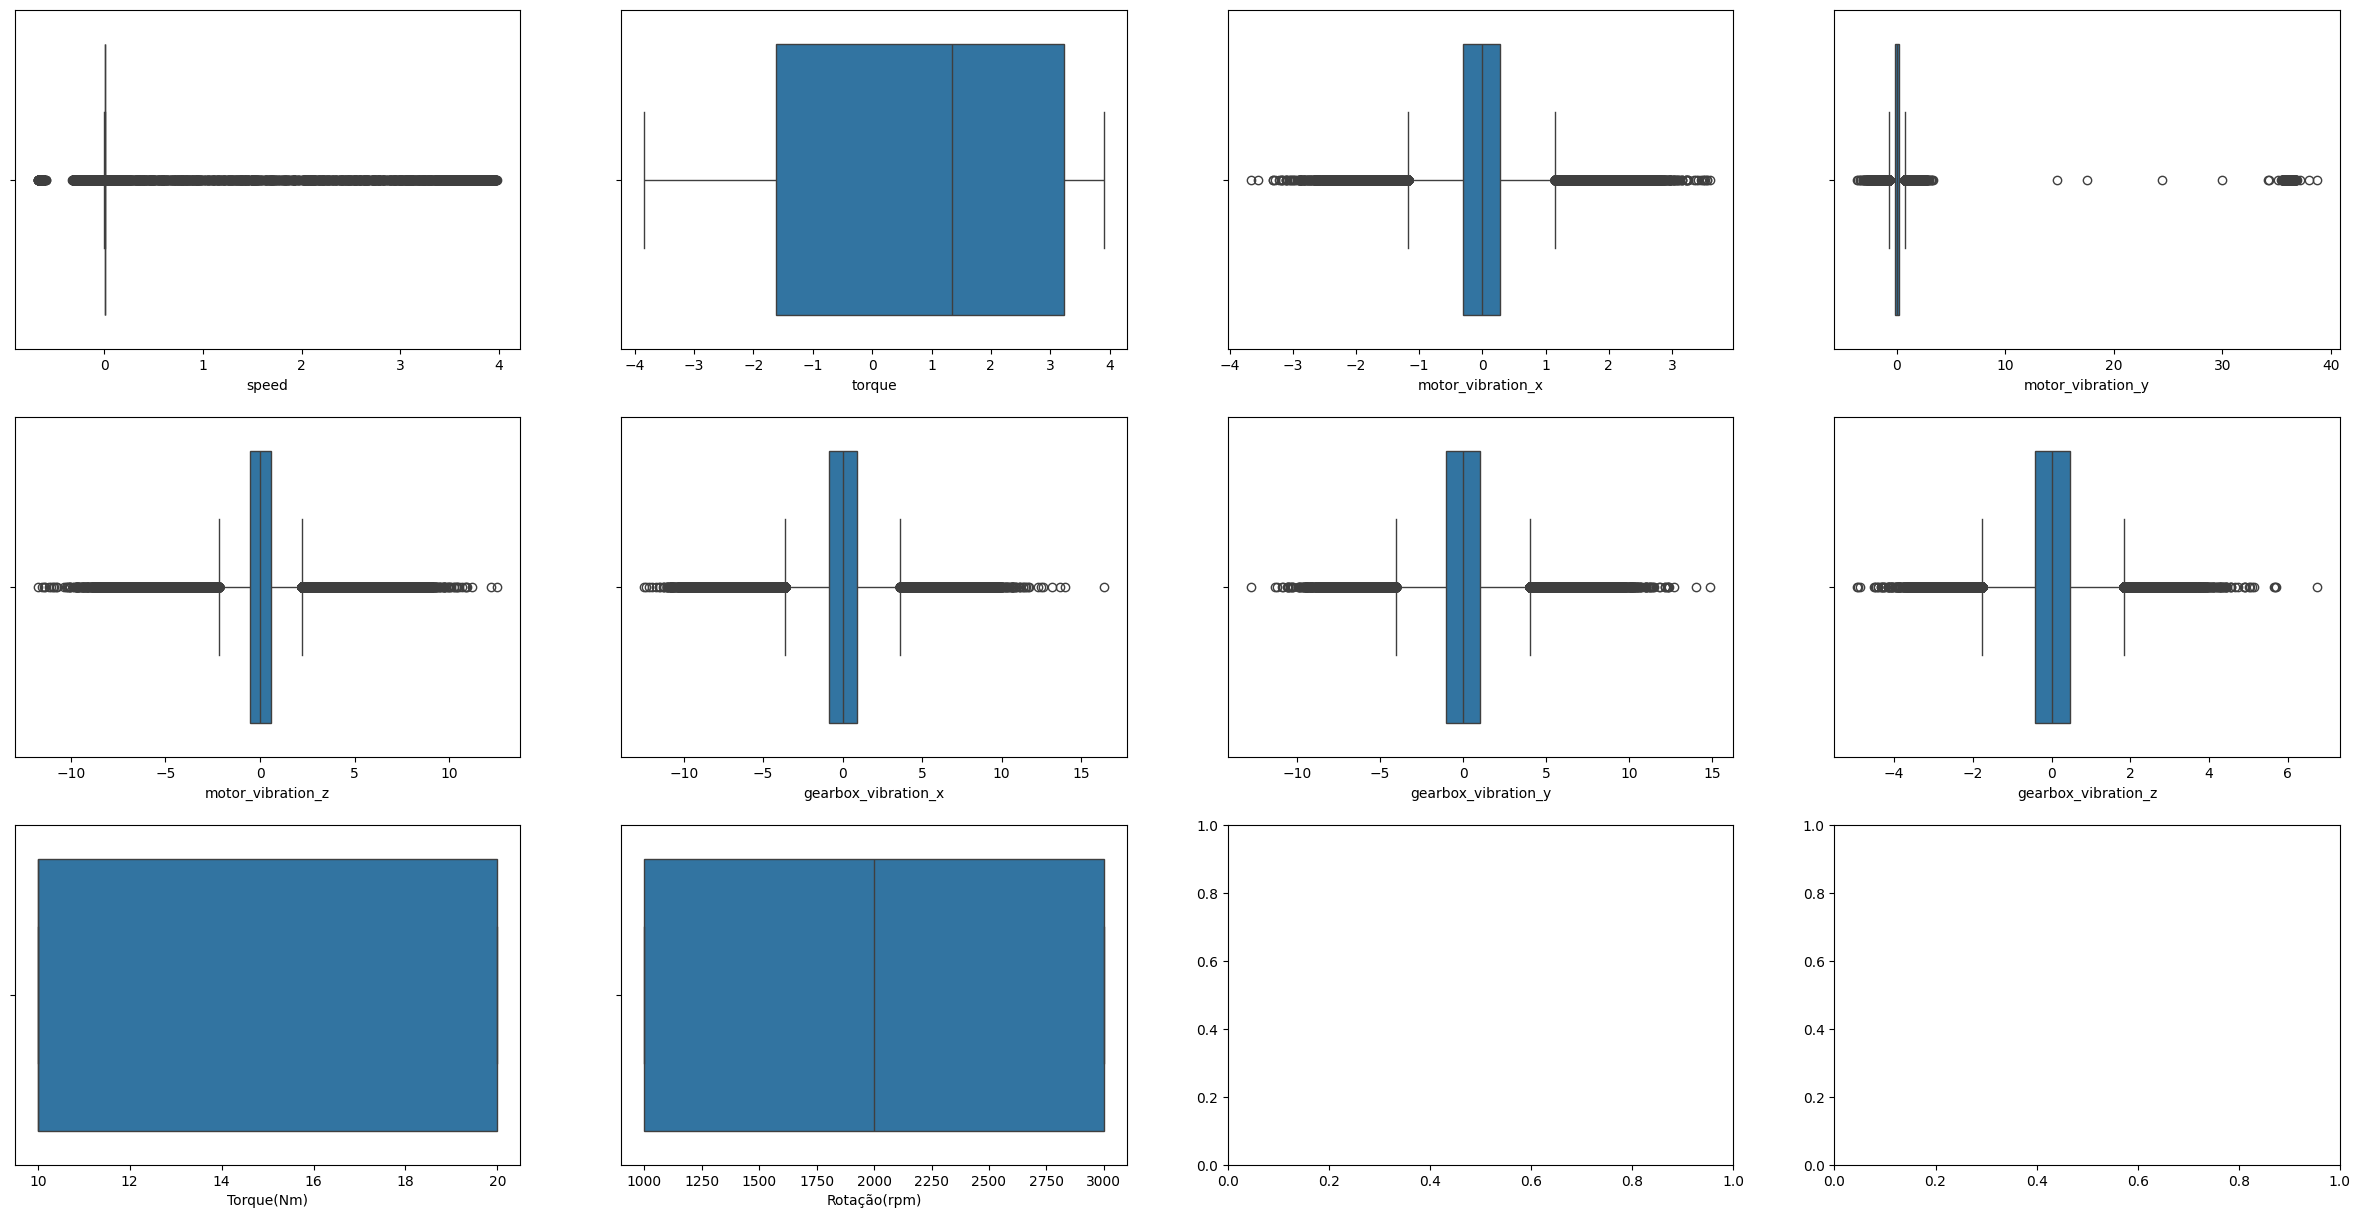

In [29]:
# Create a box plot for each variable
data = df
    
fig, ax = plt.subplots(3,4,figsize=(30,15))

for i,column in enumerate(data.columns[:-2]):   #select all the feature columns to plot
    sns.boxplot(data=data,x=column,ax=ax.ravel()[i])

## Removendo Outliers (não é correto fazer nessa etapa)
refazer isso se baseando em uma técnica específica para vibração, mencionada em artigo

In [30]:
# columns_to_clean = ['motor_vibration_x',
# 'motor_vibration_y', 
# 'motor_vibration_z',
# 'gearbox_vibration_x',
# 'gearbox_vibration_y',
# 'gearbox_vibration_z',]
# for column in columns_to_clean:
#     Q1 = df[column].quartile(0.25)
#     Q3 = df[column].quartile(0.75)
#     IQR= Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [31]:
# Q1 = df['speed'].quantile(0.25)
# Q3 = df['speed'].quantile(0.75) # olha a diferença entre 0.87 e 0.99. 2% ta subindo muito
# print(f'speed Q1 = {Q1} / speed Q3 = {Q3}')

A speed é uma variável pulsante, por isso esse comportamento.
- Não devo excluir --> e sim usar técnicas de suavização de sinais para trabalhar com eles.
- Nesse caso é melhor eu fazer o feature extraction antes de excluirr qualquer dado

Plotagem gráfica

Distribuição probabilística de kernel, podemos ver como as faults são expressas de forma diferentes nos valores de cada variável, aqui percebemos que variáveis como torque, são muito relevante para o 'Fault'

In [32]:
df =df[df['motor_vibration_y']<2]
df =df[df['motor_vibration_y']>-2]
df =df[df['motor_vibration_x']<2]
df =df[df['motor_vibration_x']>-2]
df =df[df['motor_vibration_z']<5]
df =df[df['motor_vibration_z']>-5]

df =df[df['gearbox_vibration_y']<10]
df =df[df['gearbox_vibration_y']>-10]
df =df[df['gearbox_vibration_x']<10]
df =df[df['gearbox_vibration_x']>-10]
df =df[df['gearbox_vibration_z']<3]
df =df[df['gearbox_vibration_z']>-3]
df = df[df['Fault']!='teeth_break_and_bearing_inner']
df = df[df['Fault']!='teeth_break_and_bearing_outer']


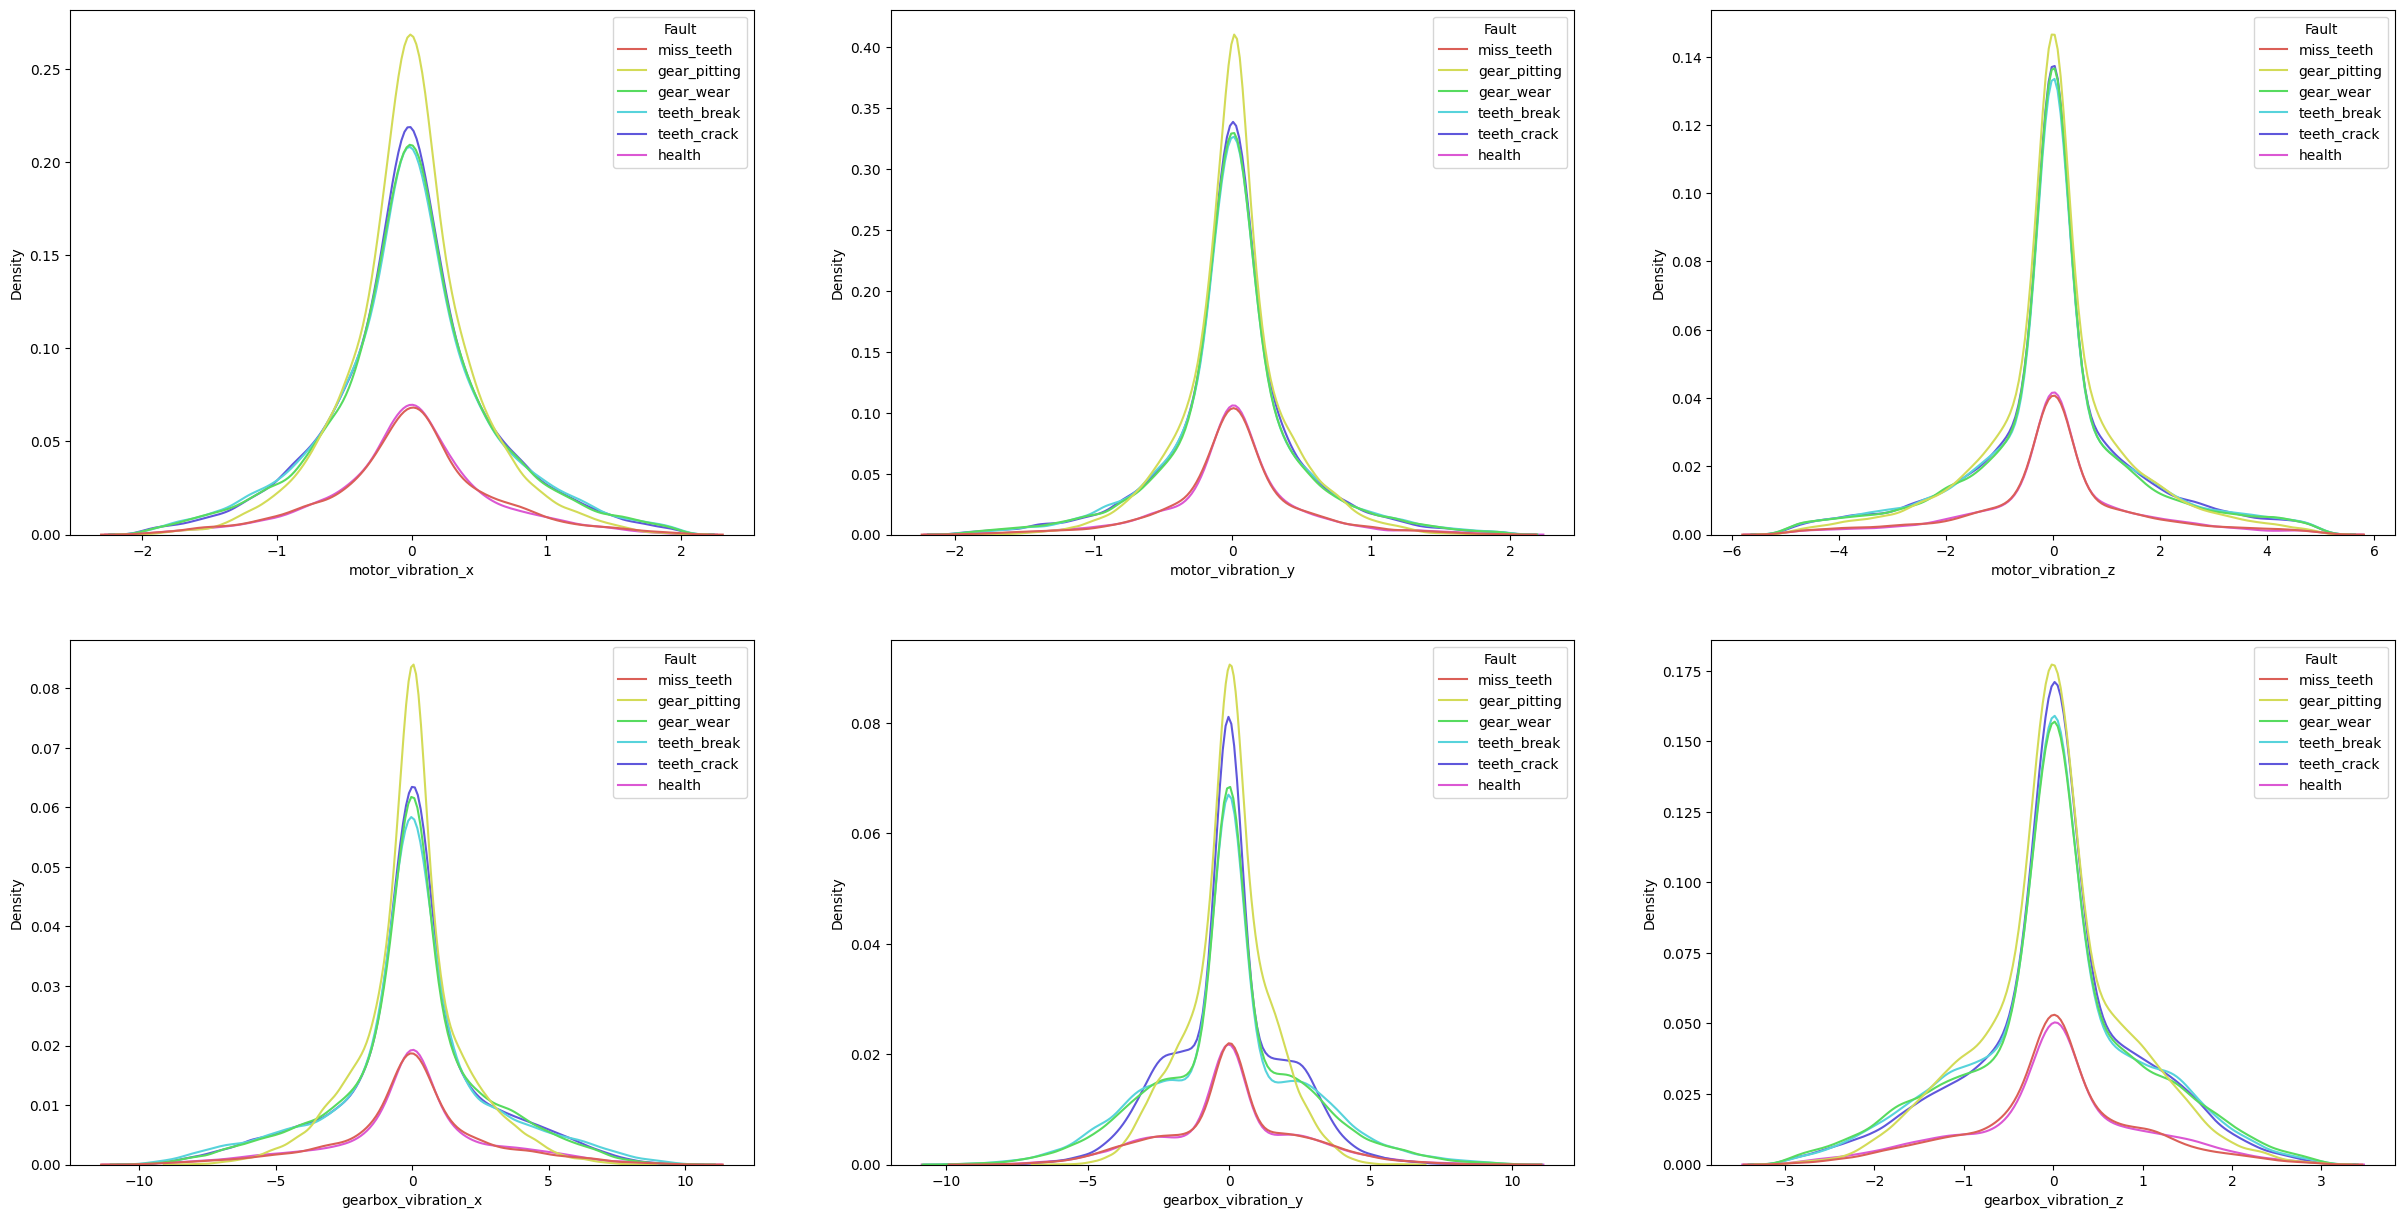

In [54]:
# Create a box plot for each variable
data = df
# A kernel density estimate kde plot
fig, ax = plt.subplots(2,3,figsize=(30,15))

columns_to_plot = [data.columns[3], data.columns[6]]

for i,column in enumerate(data.columns[2:-4]):   #select all the feature columns to plot
    sns.kdeplot(data=data,x=column,hue = 'Fault',palette='hls',ax=ax.ravel()[i],fill=False,legend=True) #hue = color

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


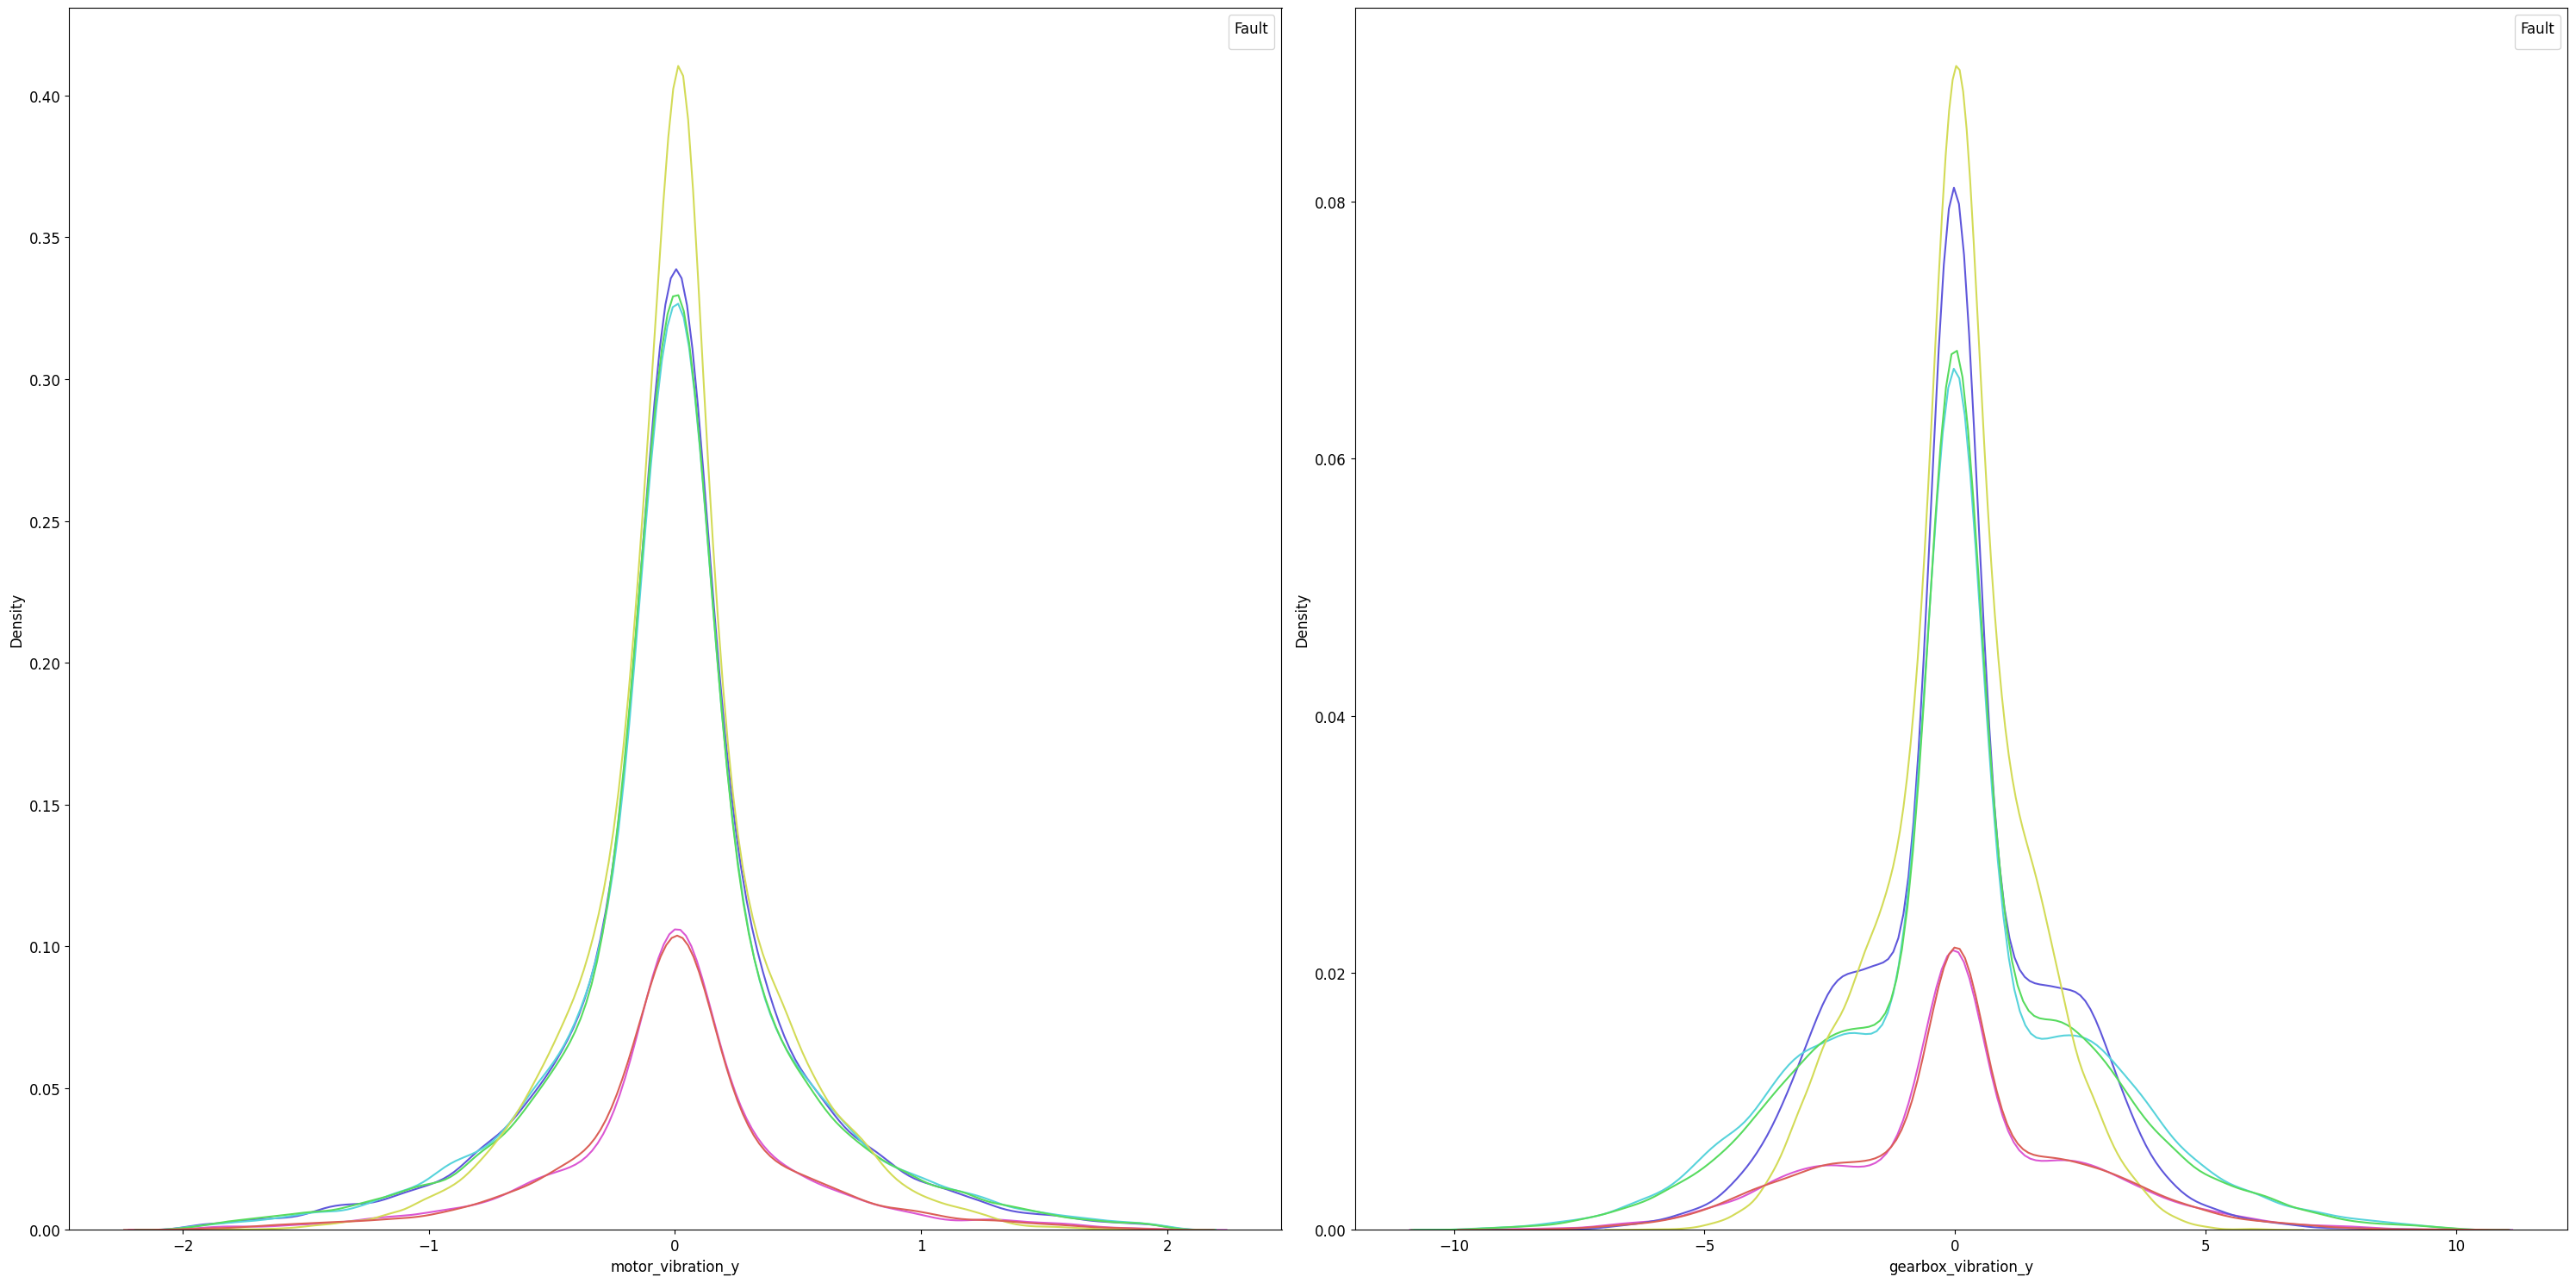

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for each variable
data = df

# A kernel density estimate kde plot
fig, ax = plt.subplots(1, 2, figsize=(30, 15))  # Create a horizontal subplot with 2 plots

# Define columns to be plotted (second and fifth)
columns_to_plot = [data.columns[3], data.columns[6]]  # Adjust indices if necessary

for i, column in enumerate(columns_to_plot):
    sns.kdeplot(data=data, x=column, hue='Fault', palette='hls', ax=ax[i], fill=False, legend=True)
    ax[i].legend(title='Fault', fontsize='large', title_fontsize='large')  # Increase legend font size and title size
    ax[i].set_xlabel(column, fontsize='large')  # Increase x-axis label font size
    ax[i].set_ylabel('Density', fontsize='large')  # Increase y-axis label font size
    ax[i].tick_params(axis='both', which='major', labelsize='large')  # Increase tick label font size

plt.tight_layout()
plt.show()


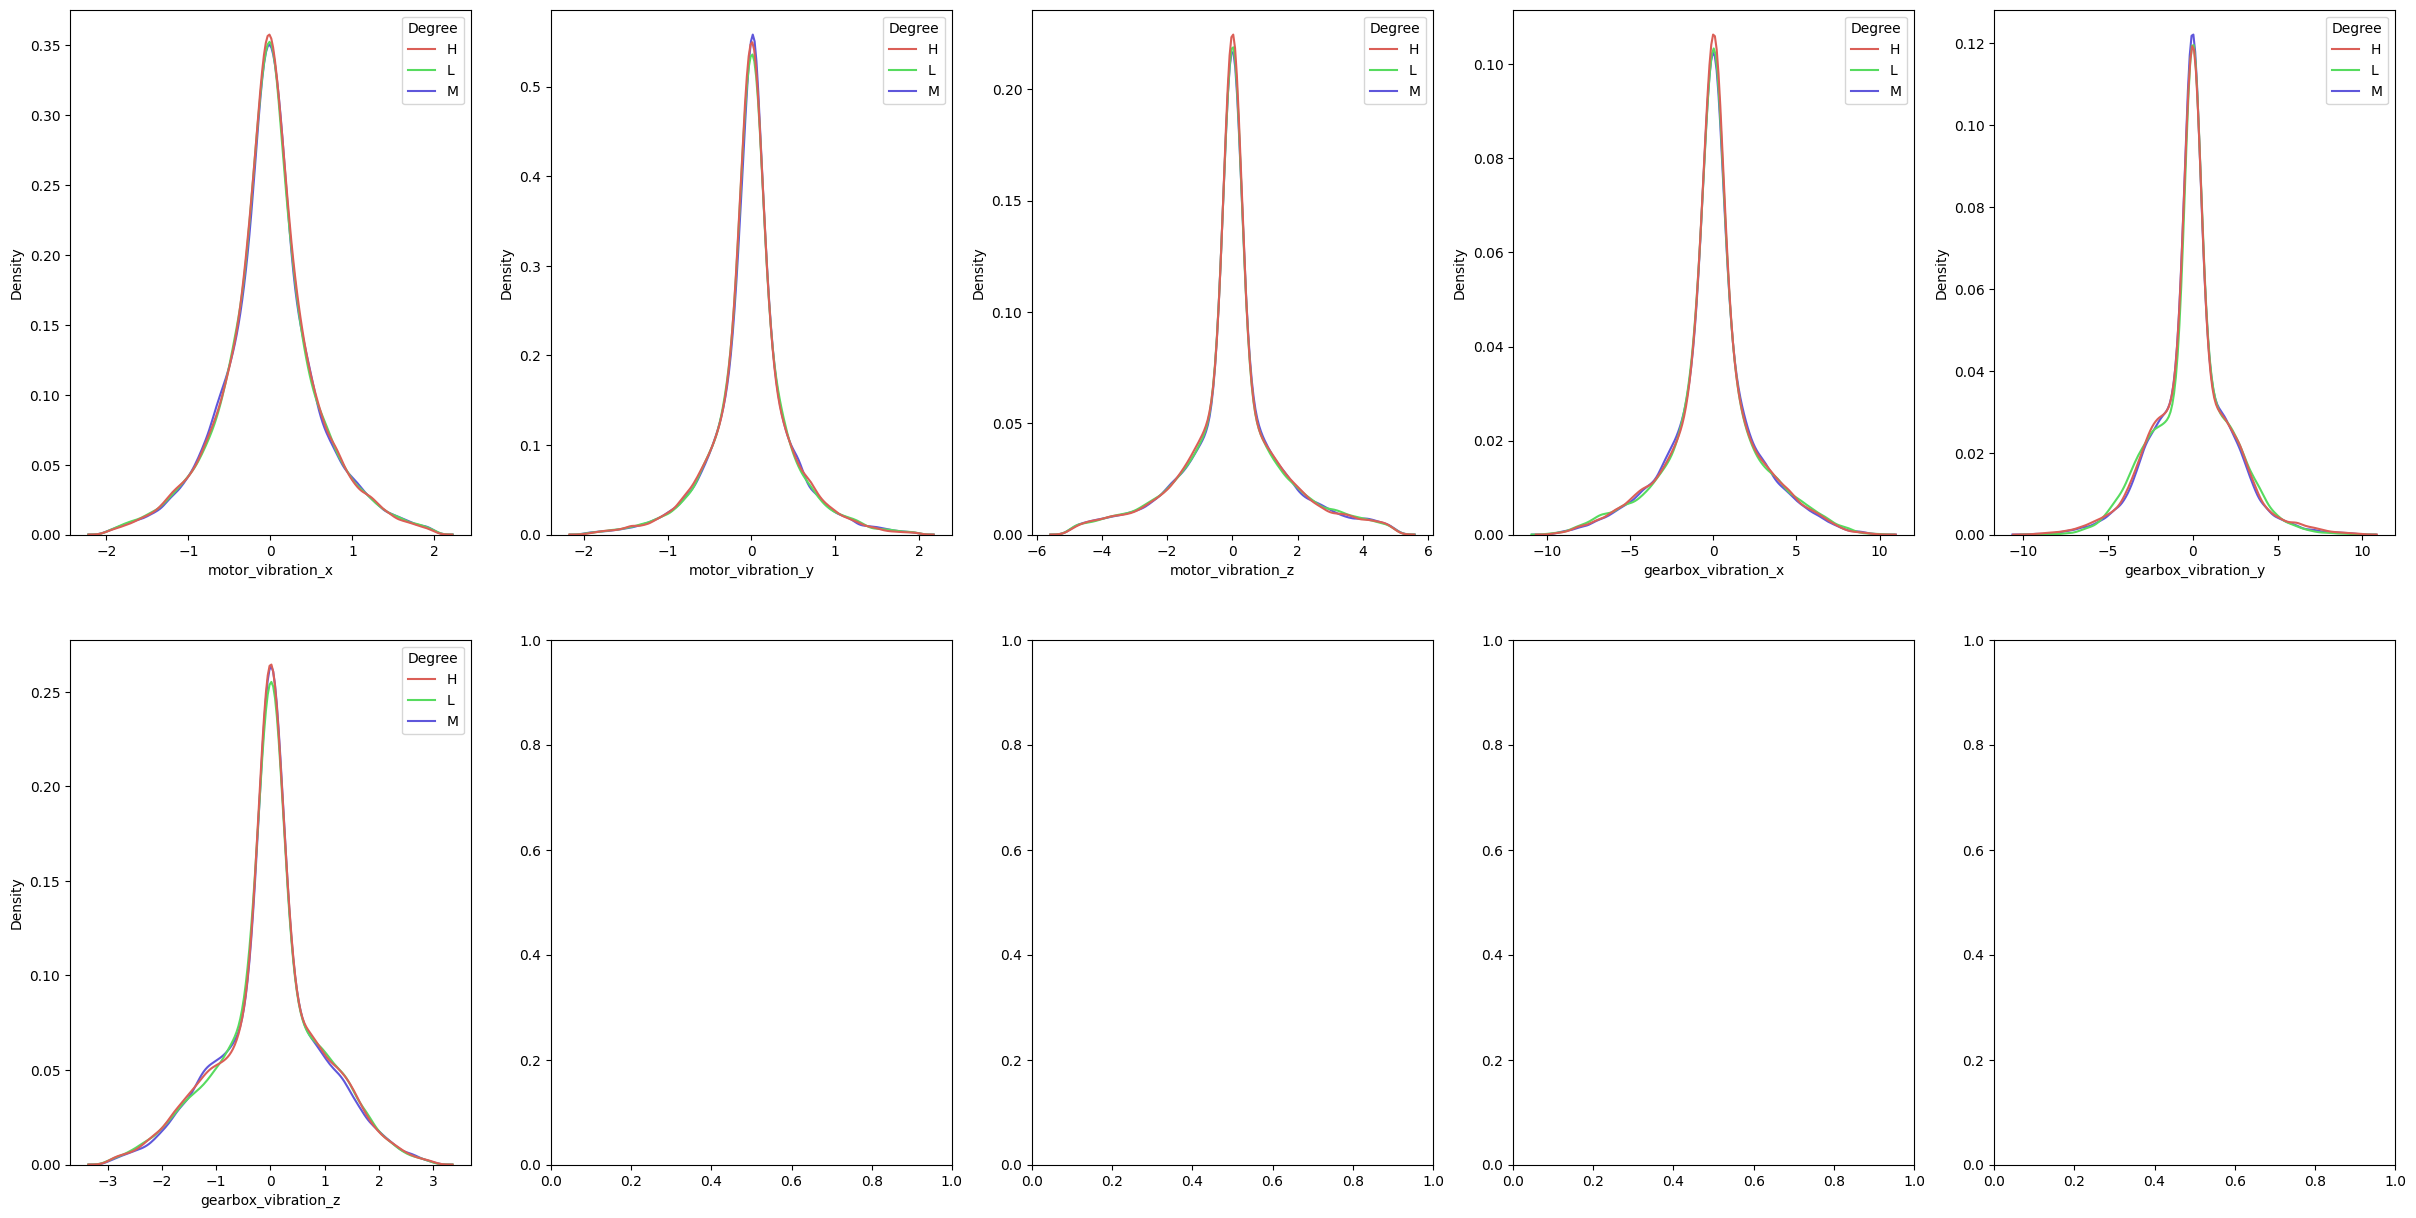

In [34]:
# Create a box plot for each variable
data = df
    
fig, ax = plt.subplots(2,5,figsize=(30,15))

for i,column in enumerate(data.columns[2:-4]):   #select all the feature columns to plot
    sns.kdeplot(data=data,x=column,hue = 'Degree',palette='hls',ax=ax.ravel()[i],fill=False,legend=True) #hue = color

# Extração de Atributos

In [35]:
df.iloc[:,0]

time
10.00007812    0.00685215
10.00789062    0.00077724
10.01570312    0.00397921
10.02351562    0.00583172
10.03132812    0.00432253
                  ...    
19.9596875     3.61468434
19.9753125     0.00027061
19.983125      0.00171781
19.9909375     0.00454903
19.99875      -0.02415776
Name: speed, Length: 100791, dtype: float64

In [36]:
df

,speed,torque,motor_vibration_x,motor_vibration_y,motor_vibration_z,gearbox_vibration_x,gearbox_vibration_y,gearbox_vibration_z,Torque(Nm),Rotação(rpm),Fault,Degree
time,,,,,,,,,,,,
10.00007812,0.00685215,1.35750175,0.1220345,-0.0825047,-0.072813,-0.5954981,0.0985622,-0.268209,10,1000,miss_teeth,NaN
10.00789062,0.00077724,1.4344096,-0.1161933,0.2056122,-0.0234723,-0.4192233,-0.0177264,-0.0122547,10,1000,miss_teeth,NaN
10.01570312,0.00397921,1.32131575,0.1570225,0.0663877,0.1339793,0.3738523,0.301075,-0.0174522,10,1000,miss_teeth,NaN
10.02351562,0.00583172,1.3143301,-0.1290798,0.0556588,-0.0368237,0.755775,0.8894205,0.2174497,10,1000,miss_teeth,NaN
10.03132812,0.00432253,1.3512373,-0.0758052,0.0412583,0.0235438,-0.9110212,-0.5858302,-0.1658559,10,1000,miss_teeth,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19.9596875,3.61468434,3.77774835,0.8021235,0.295639,0.1173377,0.8720875,-8.5356355,2.0390511,20,3000,health,NaN
19.9753125,0.00027061,3.6478102,1.1733174,0.1474023,0.1006722,-2.2358298,-4.6912909,0.658381,20,3000,health,NaN
19.983125,0.00171781,3.61621975,-0.4723787,-0.2021909,1.6357422,-1.4653802,-5.3326964,-0.9894848,20,3000,health,NaN


In [37]:
bearing_data = np.array(df.iloc[:,0])

bearing_data

array([ 0.00685215,  0.00077724,  0.00397921, ...,  0.00171781,
        0.00454903, -0.02415776])

In [38]:
temp = bearing_data
temp

array([ 0.00685215,  0.00077724,  0.00397921, ...,  0.00171781,
        0.00454903, -0.02415776])

In [39]:
# extracting features from this bearing data

feature_matrix=np.zeros((1,9))
feature_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

We will calculate following time domain features.

* Maximum value
* Minimum value
* Mean value 
* Standard deviation (Unbiased std)
* Root mean square value (RMS)
* Skewness
* Kurtosis
* Crest factor = $\frac{\text{Max}}{\text{RMS}}$
* Form factor = $\frac{\text{RMS}}{\text{Mean}}$

In [40]:
def compute_skewness(x):
    
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

In [41]:
def compute_kurtosis(x):
    
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [42]:
feature_matrix[0,0] = np.max(temp)
feature_matrix[0,1] = np.min(temp)
feature_matrix[0,2] = np.mean(temp)
feature_matrix[0,3] = np.std(temp, ddof = 1)
feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
feature_matrix[0,5] = compute_skewness(temp)
feature_matrix[0,6] = compute_kurtosis(temp)
feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]

In [43]:
# Atributos
temp.max()
temp.min()
temp.mean()
temp.std()
np.sqrt((temp**2).mean())
compute_skewness(temp)
compute_kurtosis(temp)
temp.max() / np.sqrt((temp**2).mean())
np.sqrt((temp**2).mean()) / temp.mean()


2.9250331369056273

In [44]:
feature_matrix

array([[ 3.98567438, -0.67499638,  0.42217441,  1.16047244,  1.23487415,
         2.36477968,  3.64925049,  3.22759561,  2.92503314]])

In [45]:
df_atributos =pd.DataFrame(feature_matrix)
df_atributos
 # setar index para o intervalo de tempo do recorte

,0,1,2,3,4,5,6,7,8
0,3.98567438,-0.67499638,0.4221744126,1.16047244,1.234874146,2.364779677,3.64925049,3.227595615,2.925033137


Beleza  no exemplo acima tenho as extrações de atributos pra uma variável em todo o espaço tempo. 
- Quero extrair no meu intervalo amostral de tempo
- Quero extrair pra cada variável
  - Extrair para as variáveis e dai ver qual a mais relevante variável+atributo_domínio_tempo (54 colunas)